In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
import seaborn as sns
pd.options.display.max_rows = 10
import plotly.graph_objects as go
sns.set(rc={'figure.figsize':(16,8)})

# Investigating correlations between variables

In [3]:
us_data = pd.read_csv("./output/US_cleaned_data_2018")
us_data

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description
0,0,2kyS6SvSYSE,17.11.14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,17.11.13,['SHANtell martin'],748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1,1ZAPwfrtAFY,17.11.14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,17.11.13,"['last week tonight trump presidency', '""last ...",2418783,97185,6146,12703,False,"One year after the presidential election, John..."
2,2,5qpjK5DgCt4,17.11.14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,17.11.12,"['racist superman', '""rudy""', '""mancuso""', '""k...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,3,puqaWrEC7tY,17.11.14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,17.11.13,"['rhett and link', '""gmm""', '""good mythical mo...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...
4,4,d380meD0W0M,17.11.14,I Dare You: GOING BALD!?,nigahiga,Entertainment,17.11.12,"['ryan', '""higa""', '""higatv""', '""nigahiga""', '...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,40944,BZt0qjTWNhw,18.06.14,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,18.05.18,"['aarons animals', '""aarons""', '""animals""', '""...",1685609,38160,1385,2657,False,The Cat Who Caught the Laser - Aaron's Animals
40945,40945,1h7KV2sjUWY,18.06.14,True Facts : Ant Mutualism,zefrank1,People & Blogs,18.05.18,['[none]'],1064798,60008,382,3936,False,NaN
40946,40946,D6Oy4LfoqsU,18.06.14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,18.05.18,['I gave safiya nygaard a perfect hair makeove...,1066451,48068,1032,3992,False,I had so much fun transforming Safiyas hair in...
40947,40947,oV0zkMe1K8s,18.06.14,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,18.05.17,"['Black Panther', '""HISHE""', '""Marvel""', '""Inf...",5660813,192957,2846,13088,False,How Black Panther Should Have EndedWatch More ...


In [4]:
us_data.drop(columns='Unnamed: 0', inplace=True)

# this error column doesn't give us much information, so drop
us_data.drop(columns='video_error_or_removed', inplace=True)
us_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,2kyS6SvSYSE,17.11.14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,17.11.13,['SHANtell martin'],748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.11.14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,17.11.13,"['last week tonight trump presidency', '""last ...",2418783,97185,6146,12703,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.11.14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,17.11.12,"['racist superman', '""rudy""', '""mancuso""', '""k...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.11.14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,17.11.13,"['rhett and link', '""gmm""', '""good mythical mo...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.11.14,I Dare You: GOING BALD!?,nigahiga,Entertainment,17.11.12,"['ryan', '""higa""', '""higatv""', '""nigahiga""', '...",2095731,132235,1989,17518,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.06.14,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,18.05.18,"['aarons animals', '""aarons""', '""animals""', '""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.06.14,True Facts : Ant Mutualism,zefrank1,People & Blogs,18.05.18,['[none]'],1064798,60008,382,3936,NaN
40946,D6Oy4LfoqsU,18.06.14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,18.05.18,['I gave safiya nygaard a perfect hair makeove...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.06.14,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,18.05.17,"['Black Panther', '""HISHE""', '""Marvel""', '""Inf...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...


---

In [5]:
# function to calculate the time, in days, between publication and trending of a video
def time_to_trending(publish_time, trending_time):
    total_days = 0
    days_in_a_year = 365
    days_in_a_month = 30
    
    year_publish = publish_time.split(".")[0]
    month_publish = publish_time.split(".")[1]
    day_publish = publish_time.split(".")[2]
    
    year_trending = trending_time.split(".")[0]
    month_trending = trending_time.split(".")[1]
    day_trending = trending_time.split(".")[2]
    
    date_publish = date(int(year_publish), int(month_publish), int(day_publish))
    date_trending = date(int(year_trending), int(month_trending), int(day_trending))
    delta = date_trending - date_publish
    return delta.days

In [6]:
us_data['time_difference'] = us_data.apply(lambda x: time_to_trending(x['publish_time'], x['trending_date']), axis=1)

In [7]:
us_data.get("time_difference").unique()

array([   1,    2, 2361,    8,    4,  207,    3,    5,   28,    6,  908,
       2424, 1983,  228,   32,   10,    7,    0, 2862,    9,  208, 2362,
         29,  909, 2863, 2363,  209,   26,   22,   30,   11, 2364,  210,
         27,   23,  516,   12,   13, 3176, 1704,   14, 3177,   24,  403,
       1705,  404,  538,   25, 1706,  772,   37,  405,  539,  330,   16,
        773,   38,  406,  379,  540,  331,  795,  774,   39, 1719, 3448,
        380,  407,  541,  332,  796,  775,   40, 3449, 1720,  381,  408,
       3398,  542,  333,  797, 2463,  776,   41, 3450, 1721, 2114,  382,
       3399,  409,  543,  334,  798, 2464,  777,   42, 3451, 1722, 2115,
       3400,  383, 2076, 2465,  778,   15,  247, 2202, 2077, 2466,  779,
        248, 2203, 2078, 2467, 1377,  249,  256,  250, 1820, 2163,  251,
        824, 1380, 1821, 2164, 1550,  825, 1822, 1551,  826, 1823, 1552,
        827,   21, 1420, 1421, 3113,  581,  582,  583, 2933,  584, 2411,
       1285, 2934,  135,   59, 2412, 1286, 2935,  1

---

## Overall, most trending videos take fewer than 500 days to become trending

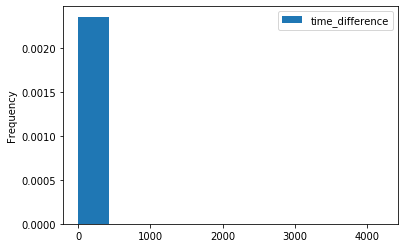

In [8]:
us_data.plot(kind='hist', y='time_difference', density=True)

## Videos that take over 200 days to become trending have a distribution skewed to the right

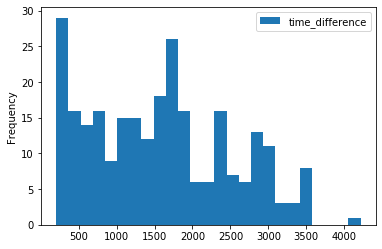

In [9]:
us_data.where(us_data.get("time_difference") > 200).plot(kind='hist', y='time_difference', bins=25)

## Video that take fewer than 200 days to trend are almost exclusively between 0 to 50 days

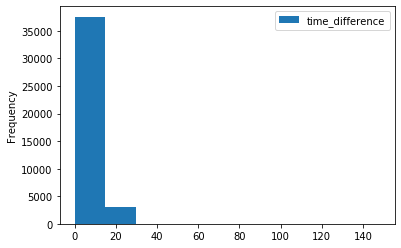

In [10]:
us_data.where(us_data.get("time_difference") <= 200).plot(kind='hist', y='time_difference')

## Most trending videos take on average 5 days to trend after publication

In [11]:
us_data.where(us_data.get("time_difference") <= 50).get("time_difference").median()

5.0

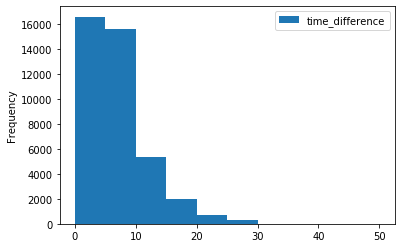

In [12]:
us_data.where(us_data.get("time_difference") <= 50).plot(kind='hist', y='time_difference')

---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002315D148198>,
      dtype=object)

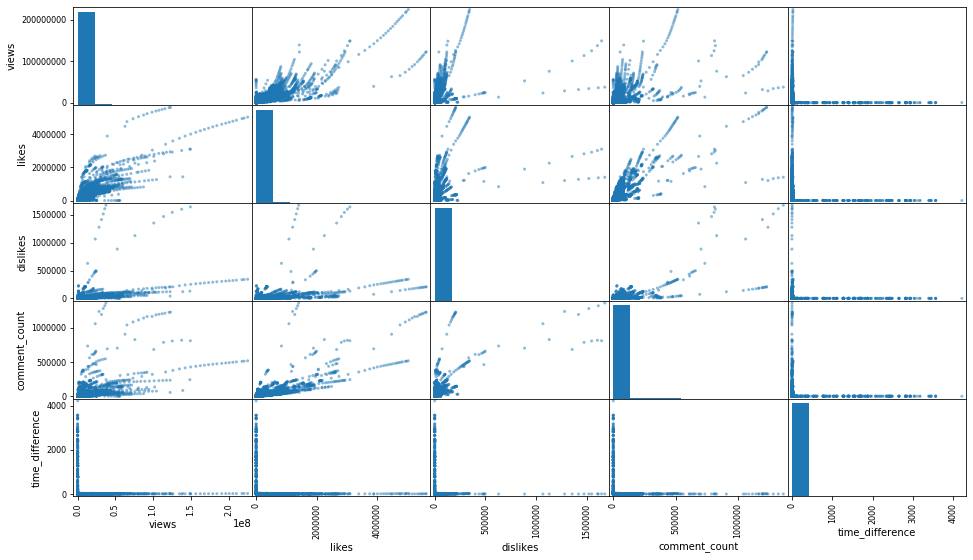

In [13]:
pd.plotting.scatter_matrix(us_data, figsize=(16,9))

In [14]:
us_data.corr()

,views,likes,dislikes,comment_count,time_difference
views,1.000000,0.849177,0.472213,0.617621,-0.014427
likes,0.849177,1.000000,0.447186,0.803057,-0.017650
dislikes,0.472213,0.447186,1.000000,0.700184,-0.007056
comment_count,0.617621,0.803057,0.700184,1.000000,-0.013254
time_difference,-0.014427,-0.017650,-0.007056,-0.013254,1.000000


---

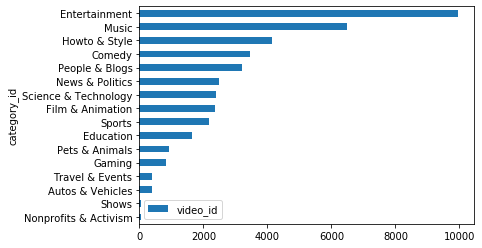

In [15]:
us_data.groupby("category_id").count().sort_values("video_id").plot(kind='barh', y="video_id")

In [21]:
us_data_numeric = us_data.groupby("category_id").mean()[['likes','dislikes']]
us_data_numeric

,likes,dislikes
category_id,,
Autos & Vehicles,11056.395833,632.838542
Comedy,62582.223315,2091.521840
Education,29745.031401,816.408213
Entertainment,53243.325070,4314.297772
Film & Animation,70787.836247,2590.681450
...,...,...
Pets & Animals,21055.110870,573.238043
Science & Technology,34374.276551,1894.378176
Shows,18993.666667,429.964912


In [35]:
us_data_views = us_data.groupby("category_id").mean()['views'].to_frame()
us_data_views

,views
category_id,
Autos & Vehicles,1.355965e+06
Comedy,1.480308e+06
Education,7.129408e+05
Entertainment,2.067883e+06
Film & Animation,3.106250e+06
...,...
Pets & Animals,8.311435e+05
Science & Technology,1.452627e+06
Shows,9.035273e+05


In [36]:
us_data_comments = us_data.groupby("category_id").mean()['comment_count'].to_frame()
us_data_comments

,comment_count
category_id,
Autos & Vehicles,2042.830729
Comedy,6521.718831
Education,3286.378019
Entertainment,7383.229426
Film & Animation,7627.744136
...,...
Pets & Animals,2892.070652
Science & Technology,4993.721783
Shows,1668.719298


In [37]:
us_data_time = us_data.groupby("category_id").mean()['time_difference'].to_frame()
us_data_time

,time_difference
category_id,
Autos & Vehicles,43.205729
Comedy,10.107318
Education,37.964976
Entertainment,13.008531
Film & Animation,41.060128
...,...
Pets & Animals,7.723913
Science & Technology,18.164098
Shows,10.719298


---

## Now, Let's compare numbers of likes and dislikes across all trending categories

In [38]:
categories = us_data_numeric.index

listOfData = us_data_numeric.to_numpy().tolist()

# z = np.random.poisson(size=(len(categories), len(us_data_numeric.columns)))

fig = go.Figure(data=go.Heatmap(
        z=listOfData,
        x=us_data_numeric.columns,
        y=categories,
        colorscale='Viridis'))

fig.update_layout(
    title='HeatMap for likes and dislikes per category',
    xaxis_nticks=36)

fig.show()

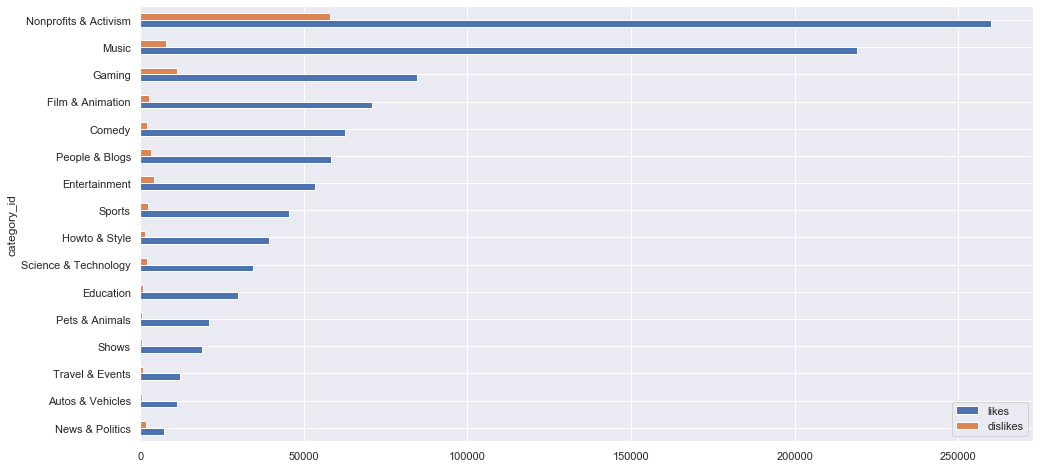

In [79]:
us_data.groupby("category_id").mean().sort_values("likes").plot(kind='barh', y=["likes","dislikes"])

## It seems `activism` and `music` videos tend to get more likes on average, whereas `activism` videos get more dislikes as well

---

## Music videos get the most views on average. However, the great number of outliers contribute to this result. The median views across all categories are between 0 and 25k

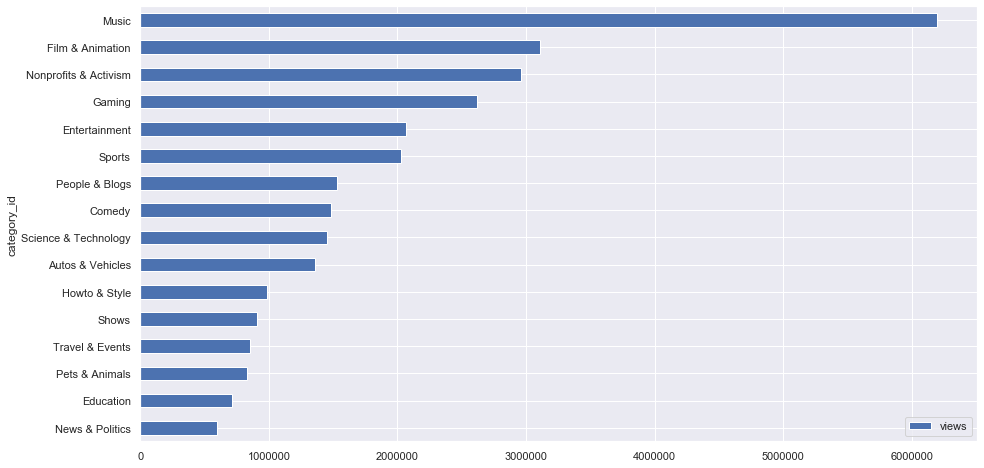

In [72]:
us_data.groupby("category_id").mean().sort_values('views').plot(kind='barh', y='views', figsize=(15,8))

(0, 20000000)

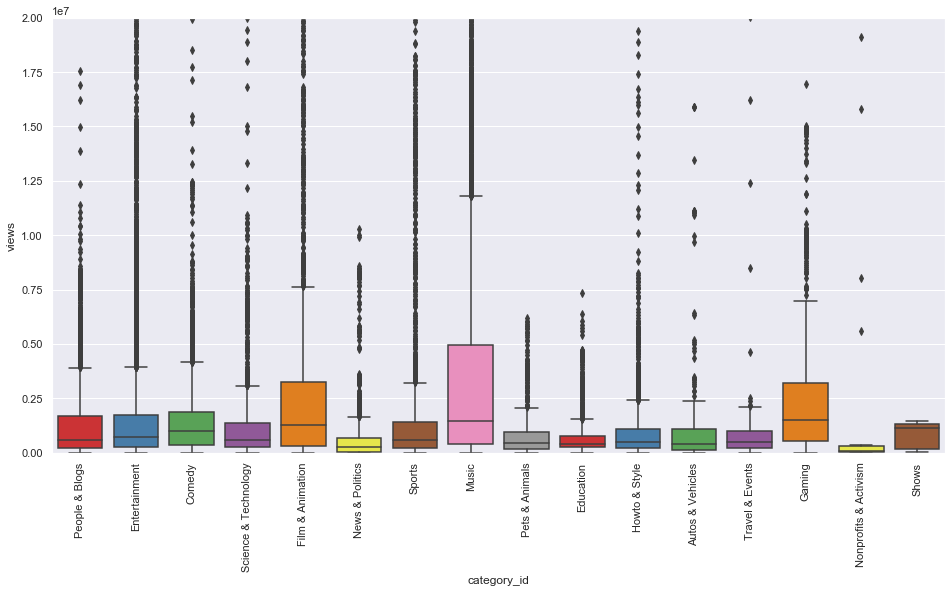

In [69]:
sns.boxplot(x="category_id", y="views", data=us_data, palette="Set1")
plt.xticks(rotation=90)
axes = plt.gca()
axes.set_ylim([0,20000000])

## Nonprofits and Activism videos get the most comments on average. However, there are lots of outliers in the 75% percentile of many categories

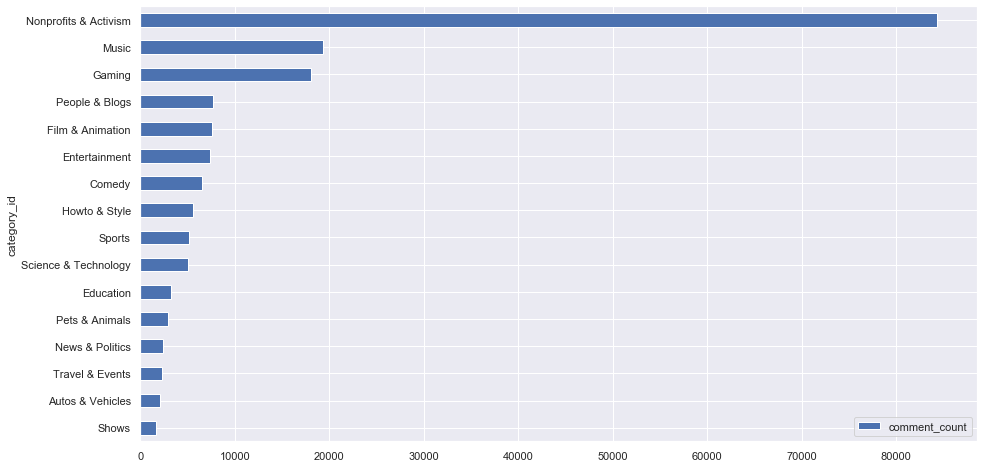

In [71]:
us_data.groupby("category_id").mean().sort_values('comment_count').plot(kind='barh', y='comment_count', figsize=(15,8))

(0, 50000)

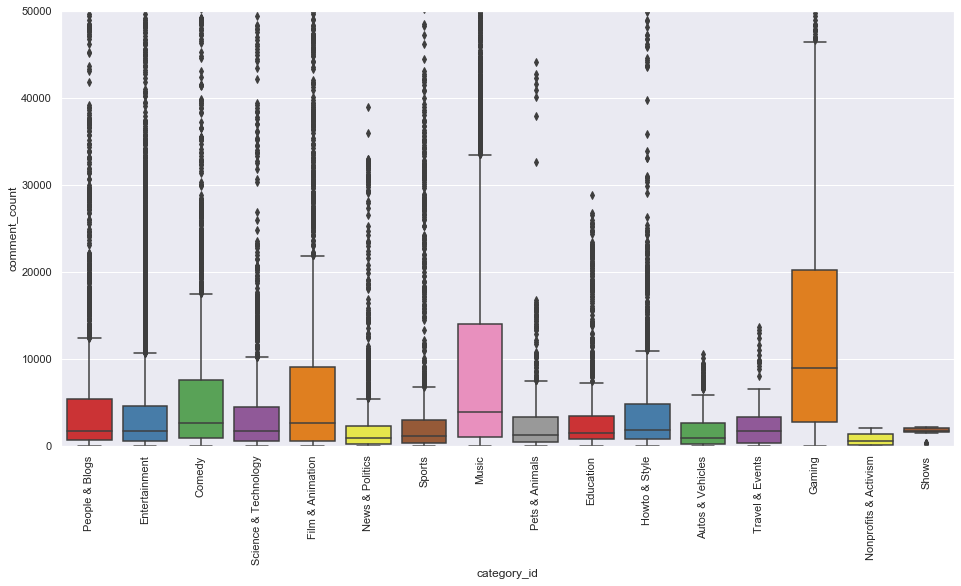

In [66]:
sns.boxplot(x="category_id", y="comment_count", data=us_data, palette="Set1")
plt.xticks(rotation=90)
axes = plt.gca()
axes.set_ylim([0,50000])

## Autos, Film, and Education videos usually take longer to become trending. Conversely, Nonprofits & Activism, Travel, and Pet videos trend shortly after release. However, the median values of trending time across all categories are uniformly between 5 to 10 days

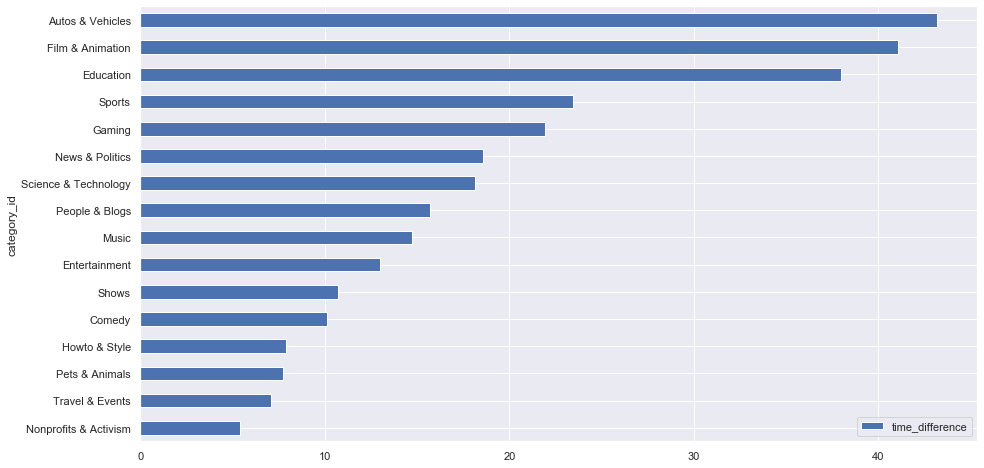

In [70]:
us_data.groupby("category_id").mean().sort_values('time_difference').plot(kind='barh', y='time_difference', figsize=(15,8))

(0, 40)

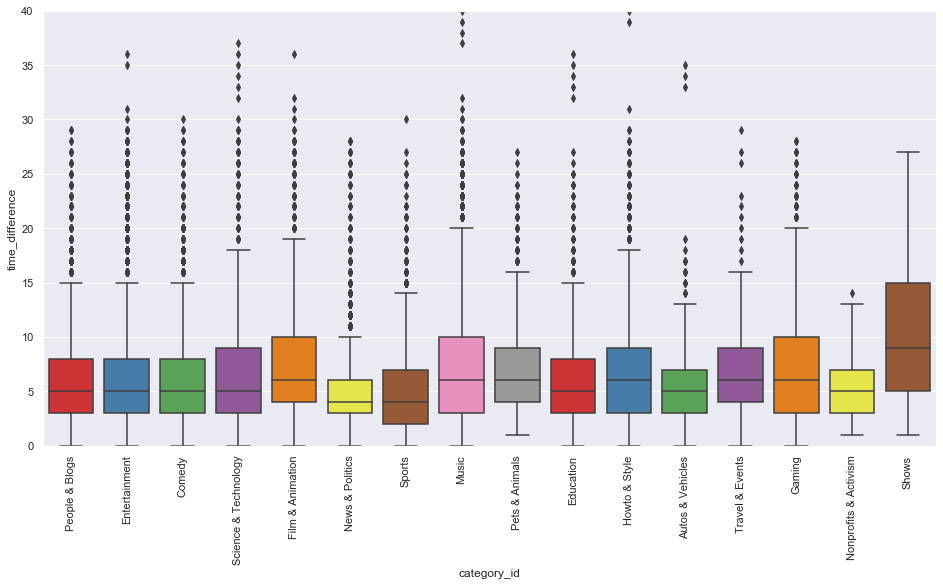

In [62]:
sns.boxplot(x="category_id", y="time_difference", data=us_data, palette="Set1")
plt.xticks(rotation=90)
axes = plt.gca()
axes.set_ylim([0,40])